In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import drivers
from importlib import  reload
from lib import data_management as dm

In [291]:
from scipy.fftpack import fft, fftshift

In [326]:
# reload(drivers.Agilent_EXA)
from drivers.Agilent_EXA import *
reload(drivers.KeysightAWG)
from drivers.KeysightAWG import *
from drivers.E8257D import E8257D

In [327]:
awg = KeysightAWG("AWG2")

In [420]:
calibrations=list(dm.load_IQMX_calibration_database("TEST", -20).values())

In [423]:
print(calibrations[0])

Calibration data for mixer TEST
Mixer parameters: {'iq_attenuation': -20, 'mixer_id': 'TEST'}
Radiation parameters: {'lo_power': 10, 'ssb_power': -20, 'lo_frequency': 7000000000.0, 'if_frequency': 100000000.0}
Optimization results: {'if': [-19.982526779174805, -72.50257873535156, -97.51728057861328], 'dc': -95.853744506835938}
Optimization time: 0 h 0 m 29.18 s


In [424]:
calibrations[0].get_optimization_results()[0]

{'dc_offsets': array([-0.21647701,  0.06030723]),
 'if_amplitudes': array([ 1.0493314 ,  1.06509741]),
 'if_offsets': array([-0.20835912,  0.05540727]),
 'if_phase': array([ 3.82731852])}

In [425]:
pb = PulseBuilder(calibrations[0], 0.1)

In [438]:
pulse = pb.add_sine_pulse(1000, 0).modulate_gauss(0.5,20).add_zero_pulse(100)\
                .add_sine_pulse(50, pi/2).modulate_rectangle(0.3).add_zero_pulse(100).build()
# pulse = pb.add_sine_pulse(10,0).build()
for i in range(1):
    pb = pb.add_sine_pulse(10,0)#.add_zero_pulse(10)
pulse = pb.build()

(0, 20)

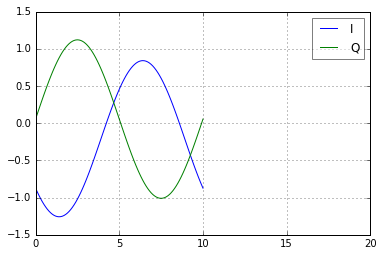

In [439]:
pulse.plot(marker="")
plt.legend(framealpha=0.5)
plt.grid()
plt.xlim(0,20)

In [440]:
awg.output_pulse_sequence(pulse)

In [ ]:
awg._visainstrument.query("")

In [98]:
calibrations[2].get_optimization_results()

({'dc_offsets': array([-0.21063726,  0.05947935]),
  'if_amplitudes': array([ 1.04905322,  1.06968917]),
  'if_offsets': array([-0.19716182,  0.06110995]),
  'if_phase': array([ 4.34076806])},
 {'dc': -93.298728942871094,
  'if': [-19.990764617919922, -61.904273986816406, -79.66572570800781]})

In [ ]:
waveform_array = pulse.get_I_waveform()
awg._visainstrument.write_binary_values(":DATA1:DAC VOLATILE,",np.around(waveform_array*8191).astype(int), datatype="h")
waveform_array = pulse.get_Q_waveform()
awg._visainstrument.write_binary_values(":DATA2:DAC VOLATILE,",np.around(waveform_array*8191).astype(int), datatype="h")

In [ ]:
def test_load_wf(wf, channel):
    wf = np.around(wf*8191).astype(int)
    array_string = "".join([str(num)+", " for num in wf])[:-2]
    awg._visainstrument.write(":DATA%d:DAC VOLATILE, %s"%(channel, array_string))
    print(":DATA%d:DAC VOLATILE, %s"%(channel, array_string))

In [ ]:
binary_repr(-10, 4)

In [ ]:
def test_load_wf_ascii(wf, channel):
    wf = np.around(wf*8191).astype(int)
#     array_string = "".join([str(num)+", " for num in wf])[:-2]
    awg._visainstrument.write_ascii_values(":DATA%d:DAC VOLATILE,"%(channel), wf, "d")
#     print(":DATA%d:DAC VOLATILE, %s"%(channel, array_string))

In [ ]:
def test_load_wf_bin(wf, channel):
    wf = np.around(wf*8191/5).astype(int)
#     bin_incorrect = util.to_ieee_block(wf, 'h')
#     print(bin_incorrect)
#     header_start = int(bin_incorrect.find(b"#"))
#     bin_correct =bin_incorrect[int(bin_incorrect[1:2])+2:]
#     print(bin_correct)
#     message=(":DATA%d:DAC VOLATILE, %%%dhb\n"%(channel,len(wf))).encode("ASCII")+bin_correct
#     awg._visainstrument.write_raw(message)
#     awg._visainstrument.write_raw(bin_correct)
#     print(message)
    awg._visainstrument.write_binary_values(":DATA%d:DAC VOLATILE,"%channel, wf, "h")

In [ ]:
test_load_wf_bin(pulse.get_I_waveform()*0.0005, 1)
test_load_wf_bin(pulse.get_Q_waveform()*0.0005, 2)

In [ ]:
test_load_wf_ascii(pulse.get_I_waveform()*0.1, 1)
test_load_wf_ascii(pulse.get_Q_waveform()*1, 2)

In [ ]:
from pyvisa import util

In [ ]:
":DATA%d:DAC VOLATILE, %s".encode()

In [ ]:
util.to_ieee_block(around(pulse.get_I_waveform()*8191).astype(int), "h")

In [ ]:
plt.plot(util.from_ieee_block(_, "h"))

In [ ]:
util.to_ascii_block(pulse.get_I_waveform()*8191, "d",",").encode("ASCII")+b"lol"

In [ ]:
awg._visainstrument.write(":DATA:DAC VOLATILE, #1899999999")

In [ ]:
awg.set_outp2(1)